In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Pharma_Industry.csv')
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [4]:
# Exploratory Data Analysis (EDA)

print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB
None


In [5]:
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [6]:
# Handle Missing Values (if any)
df = df.dropna()   

In [7]:
# Statistical Summary
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


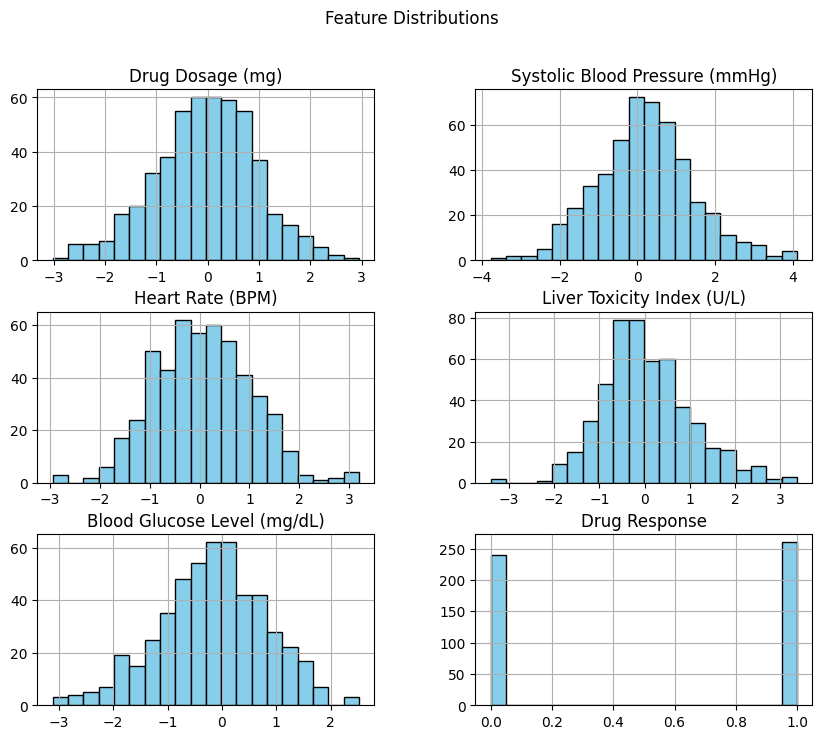

In [8]:
# histogram
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

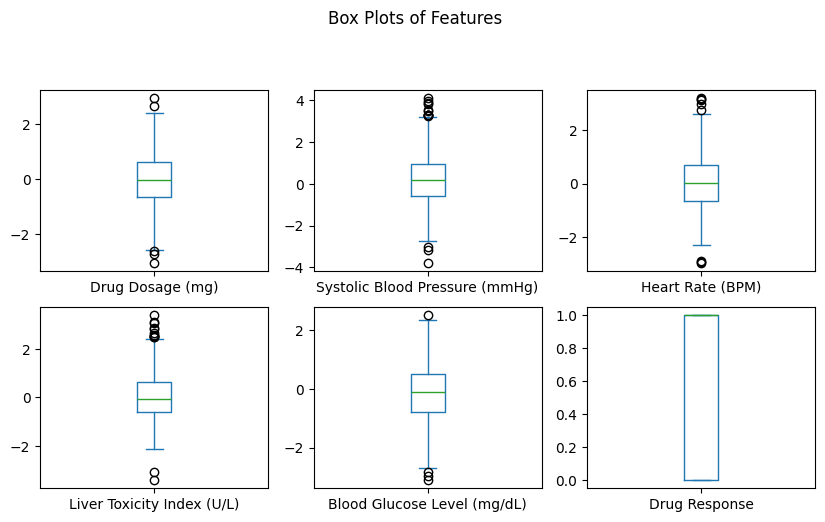

In [9]:
#  Box Plots
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 8), sharex=False, sharey=False)
plt.suptitle("Box Plots of Features")
plt.show()

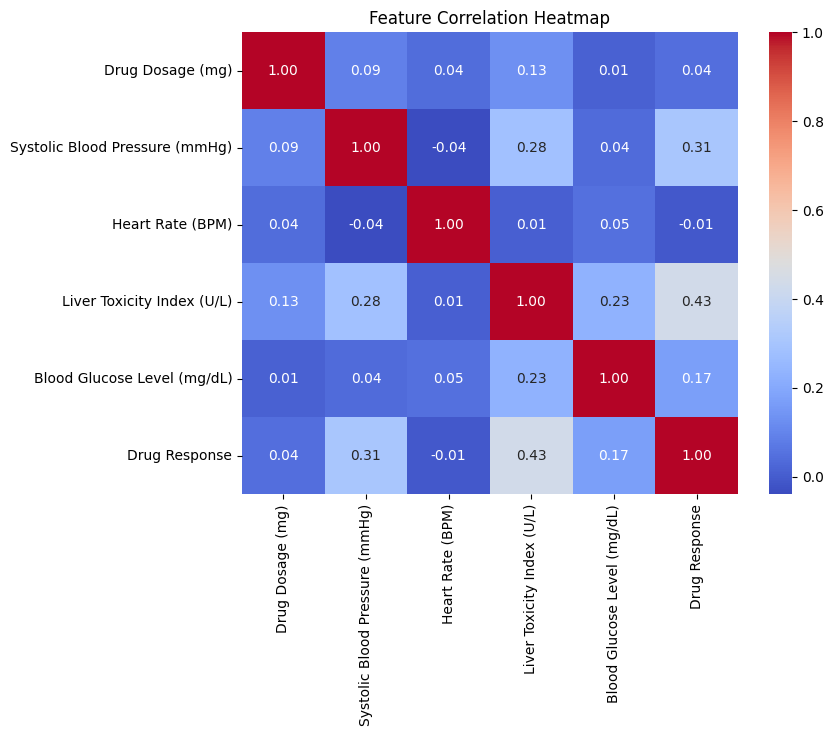

In [10]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
#Data Preprocessing
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [12]:
X = df.drop(columns=['Drug Response'], axis=1) 
y = df['Drug Response']

In [13]:
# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



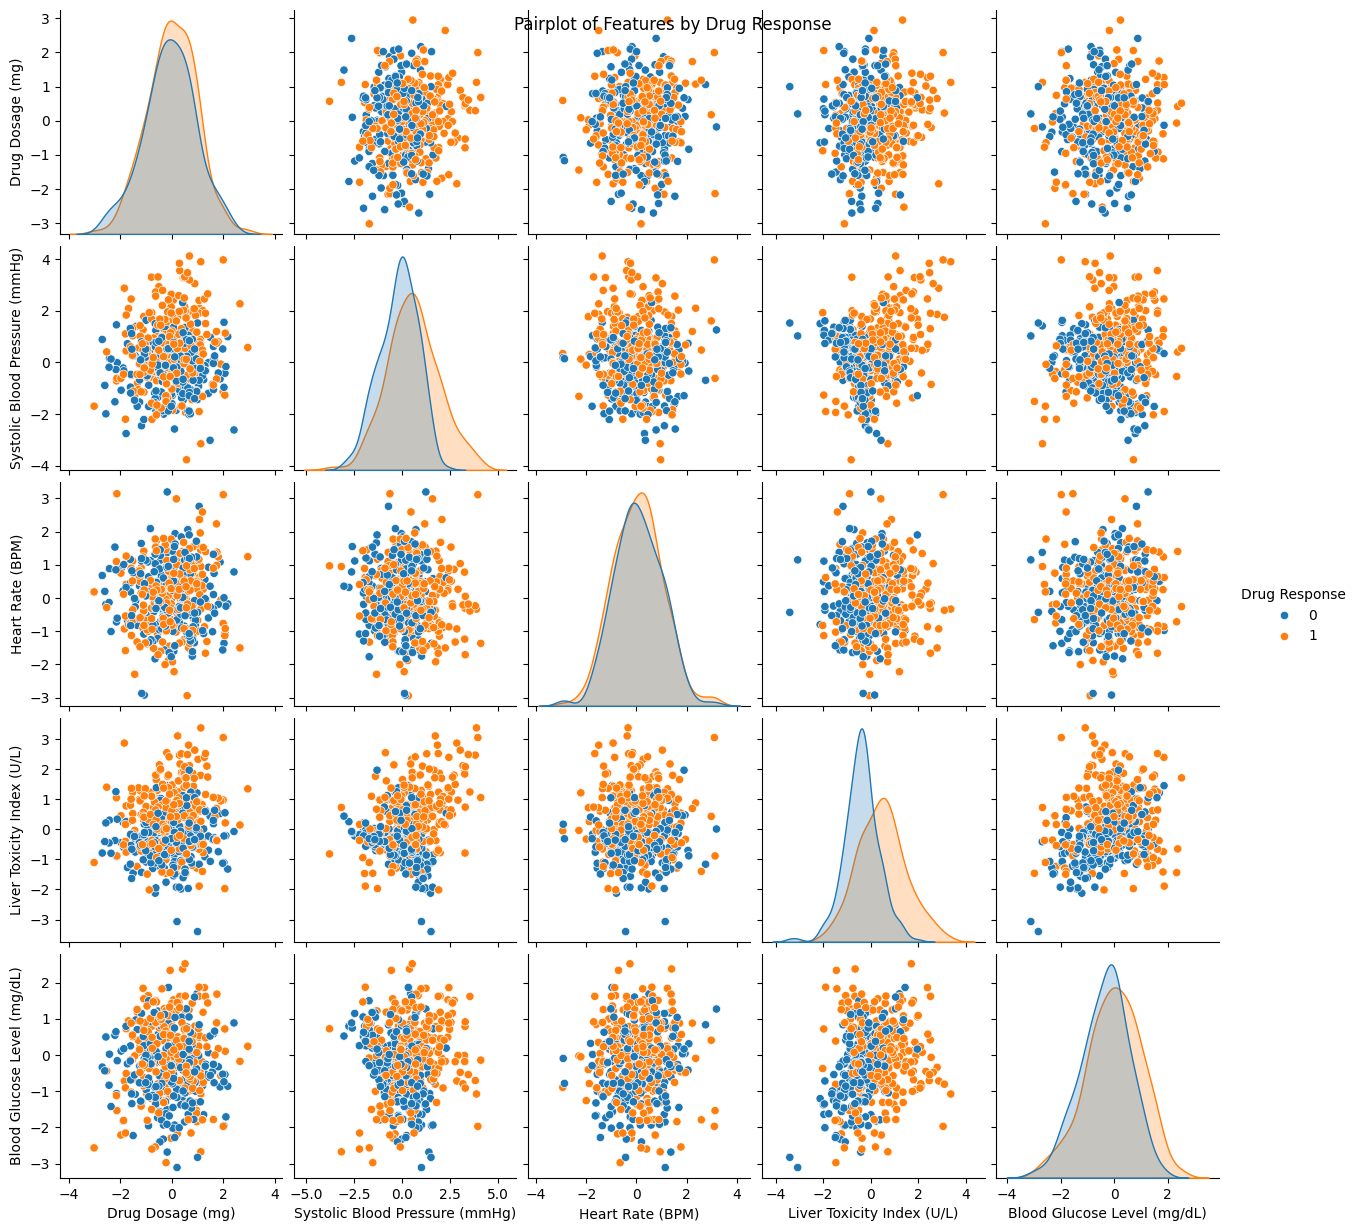

In [15]:
# Data Visualization
sns.pairplot(df, hue='Drug Response')
plt.suptitle("Pairplot of Features by Drug Response")
plt.show()

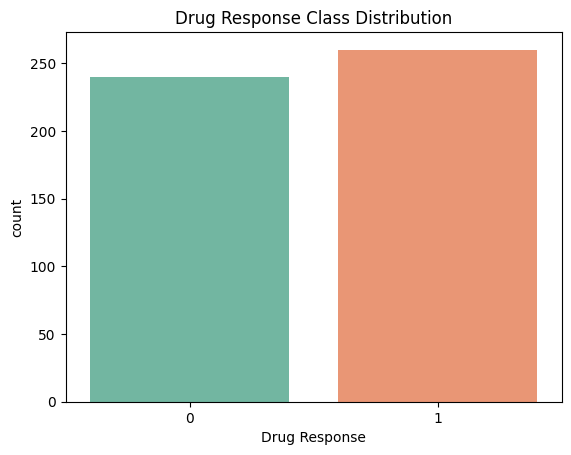

In [27]:
#Class Distribution
sns.countplot(x='Drug Response', data=df, hue='Drug Response', palette='Set2', legend=False)
plt.title("Drug Response Class Distribution")
plt.show()

In [28]:
# SVM Implementation
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
# Predict on test set
y_pred = svm_model.predict(X_test)

In [30]:
#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.72
Precision: 0.7608695652173914
Recall: 0.6730769230769231
F1 Score: 0.7142857142857143

Confusion Matrix:
 [[37 11]
 [17 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



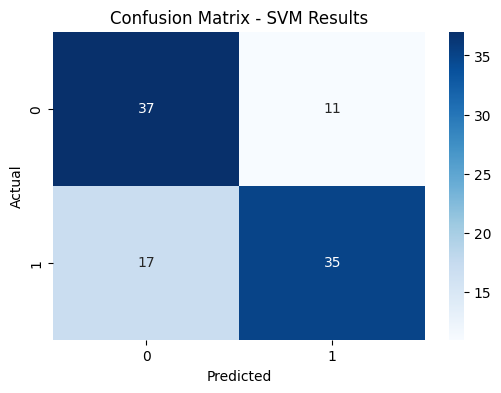

In [31]:
# Visualization of SVM Results
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM Results")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
# Parameter Tuning and Optimization
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for k in kernels:
    model = SVC(kernel=k, C=1, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    results[k] = {
        'Accuracy': accuracy_score(y_test, y_pred_k),
        'Precision': precision_score(y_test, y_pred_k),
        'Recall': recall_score(y_test, y_pred_k),
        'F1': f1_score(y_test, y_pred_k)
    }

In [33]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\n--- Kernel Comparison ---")
print(results_df)


--- Kernel Comparison ---
         Accuracy  Precision    Recall        F1
linear       0.72   0.760870  0.673077  0.714286
poly         0.65   0.666667  0.653846  0.660194
rbf          0.77   0.754386  0.826923  0.788991
sigmoid      0.73   0.755102  0.711538  0.732673


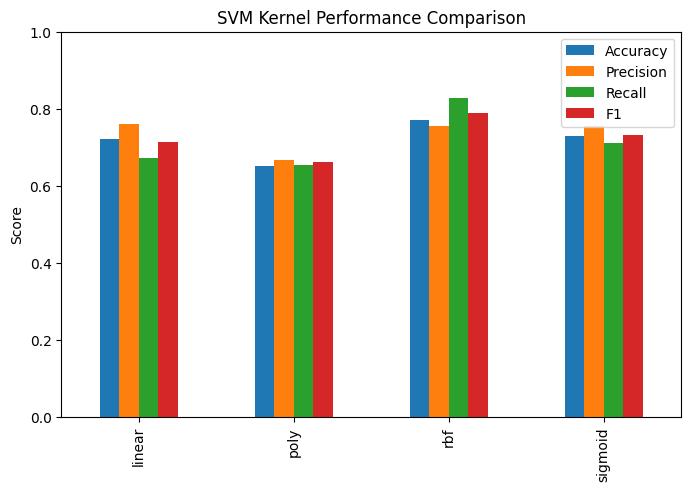

In [34]:
results_df.plot(kind='bar', figsize=(8, 5))
plt.title("SVM Kernel Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

## 2. Analysis of SVM Strengths and Weaknesses (Based on EDA and Results)

After performing Exploratory Data Analysis (EDA) and running the SVM models, here’s how we interpret the results:

Strengths of SVM for This Dataset

### Handles high-dimensional data well:

If your dataset has many features (biological, clinical, or demographic), SVM can still perform effectively since it finds an optimal hyperplane even in large feature spaces.

### Effective with clear class separation:

From EDA, if feature distributions show that “Drug_Response = 1” and “Drug_Response = 0” are somewhat separable, SVM’s margin-based classification performs very well.

### Kernel flexibility:

The kernel trick (linear, polynomial, RBF, sigmoid) allows SVM to adapt to both linear and non-linear relationships among biological variables.

Resistant to overfitting (with proper regularization):

Especially useful in small or medium-sized clinical datasets, where overfitting can be a concern.

### Weaknesses of SVM for This Dataset

Not ideal for large datasets:

Clinical trial datasets can grow large; SVMs become computationally heavy because training time scales poorly with the number of samples.

### Hard to interpret feature importance:

Unlike decision trees or logistic regression, SVM does not easily show which features (e.g., age, enzyme levels) are most influential.

Sensitive to parameter tuning:

Performance depends strongly on hyperparameters (C, gamma, kernel).

Poorly chosen parameters can lead to underfitting or overfitting.

### Poor performance with overlapping classes:

If EDA shows that “Drug Response = 0” and “1” overlap in many features (e.g., similar glucose or pressure levels), SVM may struggle to find a clean separating boundary.

## 3. Practical Implications of SVM in Real-World Classification (Drug Response Prediction)

Here’s how this applies in a pharmaceutical / healthcare context 

a. Personalized Medicine

SVM can help predict whether a patient will respond positively to a drug before the treatment begins.
Doctors can personalize treatment — prescribing drugs only to those who are likely to respond, saving cost and avoiding side effects.

b. Drug Development and Clinical Trials

During clinical trials, SVM models can classify patient groups into “Responders” vs. “Non-Responders” based on biological markers (blood pressure, enzyme activity, genetics).
This allows early identification of ineffective drugs, saving millions in R&D.

c. Biomarker Discovery

Even though SVM itself isn’t easily interpretable, feature importance can be approximated using techniques like SHAP or LIME.
Helps researchers identify which biological markers (e.g., cholesterol, glucose, gene expression) are most predictive of drug efficacy.

d. Broader Healthcare Applications

SVM can classify medical images, detect diseases (e.g., cancer, diabetes), and support decision-making systems by distinguishing between healthy vs. unhealthy patients.